In [1]:
%matplotlib inline

from scipy import signal
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os.path as path
import numpy as np
outdir = '/home/eric/Phd_thesis/figures/'
# # # Using seaborn's style
# # plt.style.use('seaborn')

# # width = 345

# nice_fonts = {
#         # Use LaTeX to write all text
#         "text.usetex": True,
#         "font.family": "serif",
#         # Use 10pt font in plots, to match 10pt font in document
#         "axes.labelsize": 10,
#         "font.size": 10,
#         # Make the legend/label fonts a little smaller
#         "legend.fontsize": 8,
#         "xtick.labelsize": 8,
#         "ytick.labelsize": 8,
# }

# mpl.rcParams.update(nice_fonts)
# print("Your style sheets are located at: {}".format(path.join(mpl.__path__[0], 'mpl-data', 'stylelib')))
from my_plot import set_size
width_pt = 506.45#'thesis'# 
plt.style.use('tex')
output_dir = '/home/eric/Phd_thesis/figures/'

# Symbols and Abbreviations

\nomenclature{$\mathcal{F}\{\cdot\}$}{Fourier transform}

\nomenclature{$\mathcal{F^{-1}}\{\cdot\}$}{Inverse Fourier transform}

\nomenclature{$\sigma$}{Spread of 1-d Gaussian function}

\nomenclature{$\alpha$}{Sharpness (Gabor function major axis)}

\nomenclature{$\beta$}{Sharpness (Gabor function minor axis)}

\nomenclature{$\gamma$}{Sharpness of Gabor filter (major axis)}

\nomenclature{$\eta$}{Sharpness of Gabor filter (minor axis)}

\nomenclature{$\theta$}{Orientation angle of Gabor filter}

\nomenclature{$h(t)$}{1-d signal}

\nomenclature{$h(x,y)$}{2-d signal}

\nomenclature{$\phi$}{Phase shift Gabor filter}

\nomenclature{$g(t)$}{1-d Gabor filter in time domain}

\nomenclature{$g(t; f)$}{1-d Gabor filter in time domain at frequency $f$}

\nomenclature{$g(n)$}{Discrete 1-d Gabor filter in time domain}

\nomenclature{$g(x, y)$}{2-d Gabor filter in spatial domain}

\nomenclature{$g(x, y; f, \theta)$}{2-d Gabor filter in spatial domain t frequency $f$ and angle $\theta$}

\nomenclature{$g^{\ast}(t)$}{Complex conjugate of $g(t)$}

\nomenclature{$g(t){\ast}h(t)$}{Convolution of two 1-d functions in time}

\nomenclature{$\Delta$}{Uncertainty}

\nomenclature{$G(f)$}{1-d Gabor filter in frequency domain}

\nomenclature{$G(u, v)$}{2-d Gabor filter in frequency domain}

\nomenclature{$f$}{Frequency}

\nomenclature{$\omega$}{Radial frequency}

\nomenclature{$f_{0}$}{Frequency of Gabor function}

\nomenclature{$j$}{imaginary unit}

\nomenclature{$r(t; f)$}{Response of 1-d Gabor filter}

\nomenclature{$r(x, y; f, \theta)$}{Response of 2-d Gabor filter}

\nomenclature{$t$}{Time}

\nomenclature{$t_{0}$}{Location of Gabor function}





\section{Color Image Spectral Decomposition}

In this chapter we present a reminder of signal theory applied to image processing for feature extraction and object detection. First, we show what are the reasons for restricting signal analysis in two predefined domains: time and frequency in one dimension and space and frequency in two dimensions. We especially recall Gabor's filter theory and properties by showing how these filters are related to Heisneberg's uncertainty principle.

\section{Signals in two domains}

In the area of signal and image processing it is well known that there are two alternative methods for describing signals (one-dimensional (1-d) or two-dimensional (2-d)). The first one is to represent the signal as a function of time while the second is to represent the signal as a function of frequency. These two representations are of special interest because we can go from one to the other via the Fourier transform (or the inverse Fourier transform); therefore, these two representations carry the same signal information but in different ways. In this thesis the following Fourier transforms pairs are used

\begin{equation}\label{eq:fourier_transforms_1d}
    \begin{gathered}
        H(f) = \mathcal{F}\{h(t)\} = \int_{-\infty}^{\infty} h(t) e^{-j2\pi f t} dt \\
        h(t) = \mathcal{F}^{-1}\{H(f)\} = \int_{-\infty}^{\infty} H(f) e^{j2\pi f t} df 
    \end{gathered}
\end{equation}

for a 1-d space and 

\begin{equation}\label{eq:fourier_transforms_2d}
    \begin{gathered}
        H(u, v) = \mathcal{F}\{h(x, y)\} = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} h(x, y) e^{-j2\pi (ux + vy)} dx dy \\
        h(x, y) = \mathcal{F}^{-1}\{H(u, v)\} = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  H(u, v) e^{j2\pi (ux + vy)} du dv 
    \end{gathered}
\end{equation}

for a 2-d space. Both representations of the signal are somewhat ideal, since the first operates at defined instants of time while the second operates on an infinite series of successive waves at defined frequencies \cite{Gabor:JIEE:1946a}. 

It is evident that the function $h(t)$ is located in both domains, however, it is also well known that no signal with compact support cannot have a finite Fourier transform and vice versa \cite{Bracewell:FourierBook:1999}, there is a certain uncertainty in the time and frequency locations of $h(t)$.


\section{The Heisenberg uncertainty principle }

The uncertainty principle is one of the most famous ideas in quantum mechanics. An early incarnation of the uncertainty principle appeared in a 1927 paper by the German physicist Heisenberg. The uncertainty principle says that we cannot measure the position $(x)$ and the momentum $(p)$ of a particle with absolute precision. The more accurately we know one of these values, the less accurately we know the other. 

However, the uncertainty principle in the field of quantum mechanics is just a particular case of a more general compromise that appears in simple phenomena of everyday life involving waves. The central idea is connected with the interrelation between frequency and duration. For example, in the case of sound waves, if we want to identify the frequency of a musical note, the shorter the sound lasts in time, the less certain we can be about the exact frequency of the sound; to find a more defined frequency, it would be necessary to listen to the sound for a longer time. In the language of signal processing, we can say that a short signal correlates highly with a wide range of frequencies and only wide signals correlate with a short range of frequencies. Formally this is expressed as

\begin{equation}\label{eq:uncertainty_principle_rad}
	\Delta t\Delta \omega \geq \frac{1}{2}
\end{equation}

where $\Delta t$ is the duration of the signal in the time domain and $\Delta \omega$ is the bandwidth of the signal in the frequency domain (CITE). The uncertainty principle then says: the product of the spectral bandwidth multiplied with the time duration of the signal cannot be less than a certain minimum value. Considering the bandwidth of the signal in terms of frequency as $\Delta f$ where $\omega = 2\pi f$, the uncertainty principle is stated as 

\begin{equation}\label{eq:uncertainty_principle_freq}
	\Delta t\Delta f \geq \frac{1}{4\pi}
\end{equation}

The Heisenberg uncertainty principle in the field of signal processing and image processing can be mathematically proved by the \textbf{Parseval's theorem}

\begin{equation}\label{eq:parseval_theorem}
	\int_{-\infty}^{\infty} h(t)^2 dt =  \frac{1}{2 \pi} \int_{-\infty}^{\infty} |H(\omega)|^2 d\omega =  \int_{-\infty}^{\infty} |H(f)|^2 df
\end{equation}

where $h(t)$ is a function and $H(f)$ its the Fourier transform. 

The \textbf{energy content} of the signal described by $h(t)$ is defined as:

\begin{equation}\label{eq:energy_content_time}
    E_{\infty} \equiv \int_{-\infty}^{\infty}  h(t)^2 dt
\end{equation}


From the Parseval's identity this may be written as:

\begin{equation}\label{eq:energy_content_frequency}
    E_{\infty} =  \int_{-\infty}^{\infty} |H(f)|^2 df
\end{equation}

The \textbf{time dispersion} of the signal is given by

\begin{equation}\label{eq:time_dispersion_no_centered}
    (\Delta t)^2 \equiv \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} (t-t_{0})^2 h(t)^2 dt
\end{equation}

where $t_0$ is the \textbf{center of gravity} of the signal defined by:

\begin{equation}\label{eq:center_of_gravity}
    t_0 \equiv \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} t h(t)^2 dt
\end{equation}

and where if we shift the origin of $t$ so that $t_{0}=0$, then

\begin{equation}\label{eq:time_dispersion}
    (\Delta t)^2 = \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} t^2 h(t)^2 dt
\end{equation}

In an analogous way, the \textbf{spectral bandwidth} of the signal is given by

\begin{equation}\label{eq:spectral_bandwidth_no_centered}
    (\Delta f)^2 \equiv \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} (f-f_{0})^2 |H(f)|^2 df
\end{equation}

where $f_{0}$ is the \textbf{spectral center of gravity} of the signal defined by:

\begin{equation}\label{eq:spectral_center_of_gravity}
    f_0 \equiv  \frac{2 \pi}{E_{\infty}} \int_{-\infty}^{\infty} f |H(f)|^2 df
\end{equation}

if we consider $f_{0}=0$:

\begin{equation}\label{eq:spectral_bandwidth}
    (\Delta f)^2 = \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} f^2 |H(f)|^2 df 
\end{equation}

If $h'(t)$ is the derivative of the function, its Fourier transform is $j2\pi f H(f)$. By applying the Parseval's theorem to the Fourier pair $h'(t)\longleftrightarrow j2\pi f H(f)$ we obtain:

\begin{equation}\label{eq:applyed_parseval_theorem}
    4 \pi^{2} \int_{-\infty}^{\infty} f^2 |H(f)|^2 df =  \int_{-\infty}^{\infty} h'(t)^2 dt
\end{equation}

By substituting in equation $(\eqref{eq:spectral_bandwidth})$, we have:

\begin{equation}\label{eq:spectral_bandwidth2}
    (\Delta f)^2 = \frac{1}{4 \pi^{2} E_{\infty}} \int_{-\infty}^{\infty} h'(t)^2 dt
\end{equation}

We use equations $(\eqref{eq:time_dispersion})$ and $\eqref{eq:spectral_bandwidth2}$ to calculate:

\begin{equation}\label{eq:time_bandwidth_disp}
    (\Delta t)^2(\Delta f)^2 = \frac{1}{4 \pi^{2} E_{\infty}^{2}} \int_{-\infty}^{\infty} t^2f(t)^2 dt \int_{-\infty}^{\infty}f'(t)^2 dt
\end{equation}

Applying the Schwartz's inequality for the integrals on the right-hand side of $\eqref{eq:time_bandwidth_disp}$:

\begin{equation}\label{eq:schwartz_inequality}
    \int_{-\infty}^{\infty}t h(t)^2 dt \int_{-\infty}^{\infty}h'(t)^2 dt  \geq \biggr\rvert \int_{-\infty}^{\infty}t h(t)h'(t)^2 dt \biggr\rvert^{2}
\end{equation}

We may integrate by parts the integral on the right-hand side of $\eqref{eq:schwartz_inequality}$

\begin{equation}\label{eq:integr_by_parts}
    \int_{-\infty}^{\infty}t h(t) h'(t)^2 dt =  \frac{1}{2}t h(t)^2 \biggr\rvert_{-\infty}^{\infty} - \frac{1}{2} \int_{-\infty}^{\infty}h(t)^2 dt
\end{equation}

If $\lim_{t\rightarrow \infty} t h(t)^2=0$, the first term on the right-hand side of $\eqref{eq:integr_by_parts}$ vanishes and from equation $\eqref{eq:energy_content_time}$ we have

\begin{equation}\label{eq:energy_content_developped}
    \int_{-\infty}^{\infty} t h(t)h'(t) dt = -\frac{1}{2} E_{\infty}
\end{equation}

If we use this into $\eqref{eq:schwartz_inequality}$ and then into $\eqref{eq:time_bandwidth_disp}$ we obtain:

\begin{equation}\label{eq:uncertainty_principle_freq_square}
   (\Delta t)^2(\Delta f)^2 \geq \frac{1}{16\pi^{2}} 
\end{equation}

This is the mathematical statement of the uncertainty principle in signal processing.

\section{Gabor filters}

The uncertainty principle shows that time and frequency are two fundamental domains and physically measurable quantities, but still idealizations if one is considered from the other's perspective.
Frequency is a simple waveform in the time domain, but to be sharply defined in the frequency domain it must be infinite in the time domain; a waveform always existed and remains forever. In everyday life it is very difficult to find phenomena with these characteristics, it is more common to find signals that have properties from both domains; certainly they have some frequency characteristics, but they also have a starting point and after some time these signals begin to fade away. This was the motivation of Dennis Gabor to represent signals simultaneously in time and frequency through the Gabor Elementary Function (GEF) \cite{Gabor:JIEE:1946a}. The function represents the minimal quantum of information, that is, it occupies the minimal area, a rectangle, in the time-frequency plane; the minimal amount of simultaneous information in time and frequency.  

The Gabor function is derived form the uncertainty principle, therefore, it has shape for which the product $\Delta t \Delta f$ assumes the smallest possible value, i.e., for which the inequality in \eqref{eq:uncertainty_principle_freq} turns into an equality ($\Delta t \Delta f = \frac{1}{4 \pi}$). This is the modulation product of a harmonic oscillation of any frequency with pulse of the form of a probability function \cite{Gabor:JIEE:1946a}
%\frac{1}{\sqrt{2\pi}\sigma} 
%\begin{equation}\label{eq:gabor_function_1d_time}
%    g(t) =  e ^{-\frac{1}{2 \sigma^{2}}(t-t_0)^2} e ^{j 2 \pi f_0 t + \phi}
%\end{equation}

\begin{equation}\label{eq:gabor_function_1d_time}
    g(t) =  e ^{-\alpha(t-t_0)^2} e ^{j 2 \pi f_0 t + \phi}
\end{equation}

where $\alpha$ express the \textit{spread} and $t_0$ denotes the centroid of the Gaussian function, $f_0$ is the frequency of the harmonic oscillations, and $\phi$ defines the phase shift of the oscillation. The representation of the Gabor function in the frequency domain is defined by the Fourier transform of \eqref{eq:gabor_function_1d_time} $G(f) = \mathcal{F}\{g(t)\}$ and has the analytical form

%\begin{equation}\label{eq:gabor_function_1d_freq}
%    G(f) =   e ^{-2 \pi^{2} (f-f_0)^2} e ^{j 2 \pi t_0 (f-%f_0) + \phi}
%\end{equation}

\begin{equation}\label{eq:gabor_function_1d_freq}
    G(f) =  \sqrt{\frac{\pi}{\alpha^2}} e ^{-\left(\frac{\pi}{\alpha}\right) ^{2} (f-f_0)^2} e ^{j 2 \pi t_0 (f-f_0) + \phi}
\end{equation}

The equations \eqref{eq:gabor_function_1d_time}} and \eqref{eq:gabor_function_1d_freq}} show straightforward that the center of gravity $t_0$ is equal to \eqref{eq:center_of_gravity} and the spectral center of gravity $f_0$ is equal to \eqref{eq:spectral_center_of_gravity}, i.e., the Gabor functions follow the Heisenberg's uncertainty principle.  



3.5449077018110318
354.3465014035247 100.00000000000212
1.0 3.5449077018110318
250.66268372626408 250.66282746310537


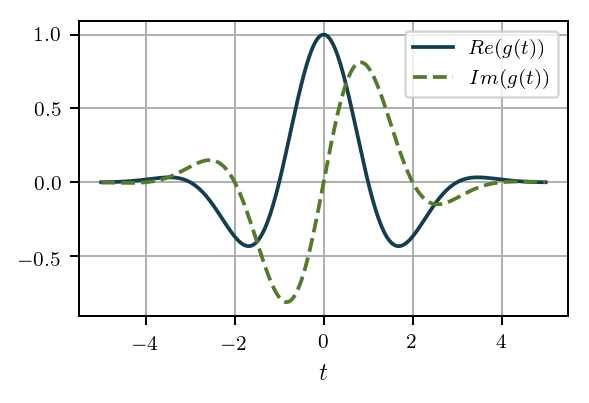

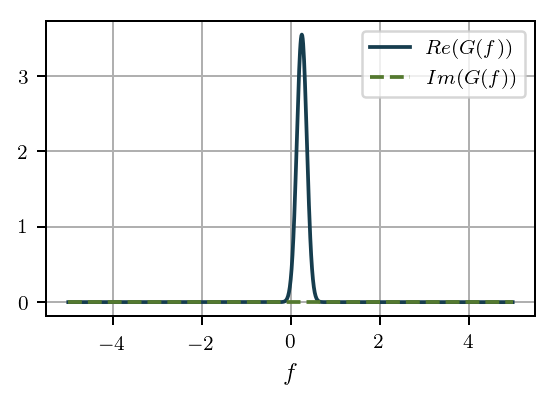

In [2]:
t = np.arange(-5, 5, 0.01)
f = np.arange(-5, 5, 0.01)
f_0 = 1/4. 
t_0 = 0.
alpha = 0.5


gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
gt = gauss_t * np.exp(1j* 2 *np.pi * f_0 * t)

gauss_f = np.exp(- (np.pi/alpha)**2 * (f-f_0)**2)
gf = gauss_f * np.exp(-1j* 2*np.pi * (f-f_0) * t_0)
gf *= np.sqrt(np.pi/alpha**2)

print np.sqrt(np.pi/alpha**2)
plt.figure(figsize=set_size(width=width_pt, fraction=0.5), dpi=180)
# plt.plot(t, gauss, lw=4, c=plt.cm.cubehelix(0.6))
plt.plot(t, gt.real, c=plt.cm.cubehelix(0.2))
plt.plot(t, gt.imag, '--', c=plt.cm.cubehelix(0.4))
plt.grid()
plt.legend((r'$Re(g(t))$', r'$Im(g(t))$'), loc='upper right')
plt.xlabel(r'$t$')
# plt.ylabel(r'$g(t)$')
# plt.savefig(outdir + 'GaborFilter_time_1d.pdf', format='pdf', bbox_inches='tight')


plt.figure(figsize=set_size(width=width_pt, fraction=0.5), dpi=180)
# plt.plot(f, np.fft.fftshift(np.fft.fft(gt)), c=plt.cm.cubehelix(0))
plt.plot(f, gf.real, c=plt.cm.cubehelix(0.2))
plt.plot(f, gf.imag, '--', c=plt.cm.cubehelix(0.4))
plt.grid()
plt.xlabel(r'$f$')
# plt.ylabel(r'$G(f)$')
plt.legend((r'$Re(G(f))$', r'$Im(G(f))$'), loc='upper right')
# plt.savefig(outdir + 'GaborFilter_freq_1d.pdf', format='pdf', bbox_inches='tight')


print np.abs(gt).sum(), np.abs(gf).sum()
print np.abs(gt).max(), np.abs(gf).max()
print (np.abs(gt)**2).sum(), (np.abs(gf)**2).sum()

\subsection{Filter normalization}

The Gabor filter can be more appropriately defined by taking the following justifications. First, we must remember that we use the Gabor function as a linear filter to analyze a signal. Under this condition, the temporal analysis of the signal is carried out using the convolution operator. Considering that the Gabor function is concentrated near the time instant $t_0$ and that a convolution centered at the origin is preferable, then $t_0 = 0$. Another parameter that we can omit is the phase shift $\phi$. There is no evidence that any specific phase would be more beneficial than any other. Moreover, for the functions to be similar at all locations, the phase shift should depend on the location $t_0$, and thus, the phase shift can be removed from the origin centered filter ($\phi$ = 0). The Gabor filter function in its compact form is defined as 

\begin{equation}\label{eq:gabor_function_1d_time_compact}
    g(t) =  e ^{-\alpha t^2} e ^{j 2 \pi f_0 t }
\end{equation}

The Gabor filter defined by the equation \eqref{eq:gabor_function_1d_time_compact} has a spread that only depends on the parameter $\alpha$, regardless of the center frequency $f_0$. This means that when implementing the Gabor function in a filter bank at different frequencies to obtain a multi-spectral decomposition of a signal, all the filters of the bank will have the same duration. The fact that the bank filters have the same width at all frequencies is not a problem nor is it a requirement to analyze a signal with the Gabor function, however, making the filter width dependent on its frequency implies a multi-resolution analysis, since the filters behave like a scaled version of each other. To accomplish this, remember that the envelope of a Gabor function is defined by a Gaussian window 

\begin{equation}\label{eq:1d_gaussian_function}
    w(t)=e^{-\frac{(t-t_0)^2}{2\sigma^2}}
\end{equation}

A Gaussian window is infinite in extent, so it is characterized by its locality $t_0$ and its standard deviation $\sigma$, which in this context defines the width of the Gaussian function and therefore, affects the spread of the Gabor filter. From equations  \eqref{eq:gabor_function_1d_time} and \eqref{eq:1d_gaussian_function} it is noted that 

\begin{equation}\label{eq:gabor_spread_1d}
    \alpha^2 = \frac{1}{2 \sigma^{2} }
\end{equation}


Knowing that the Gabor filter is a function that is representable in the time and frequency domain, we can normalize it according to the application and following the next conditions \cite{Boukerroui.Noble.ea:JMIV:2004}.

\begin{enumerate}
    \item Maximum condition:
        \begin{equation}\label{eq:maximun_condition}
            \max_t{|G(f)|} = 1
        \end{equation}
    \item Constant spectra condition:
        \begin{equation}\label{eq:constant_energy_condition}
            \int_{-\infty}^{\infty} |g(t)| df = 1
        \end{equation}        
\end{enumerate}

From the equation \eqref{eq:gabor_function_1d_freq}, it is evident that the maximum response of the Gabor filter in the frequency domain is a function of $\sqrt{\pi/\alpha^2}$, therefore, its inverse

\begin{equation}\label{eq:normalization_factor}
    \sqrt{\frac{\alpha^2}{\pi}}
\end{equation}


can be used as the Gabor filter normalization factor in the time domain and fulfill the two conditions mentioned above. 

3.5449077018110318
99.95930252922952 28.209479177388413
0.28209479177387814 1.0
19.947102581857656 19.947114020072057


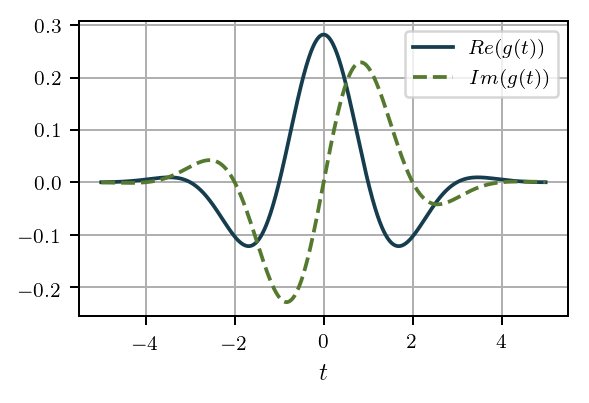

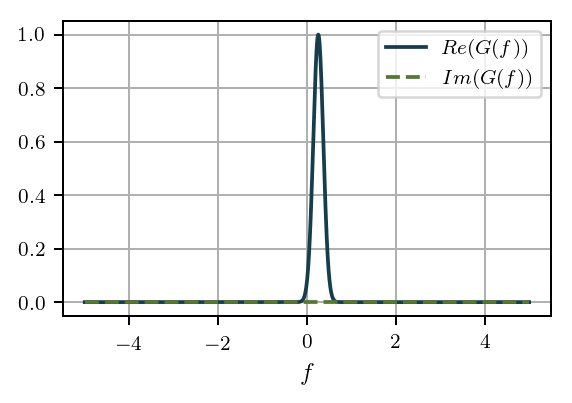

In [3]:
t = np.arange(-5, 5, 0.01)
f = np.arange(-5, 5, 0.01)
f_0 = 1/4. 
t_0 = 0.
alpha = 0.5


gauss_t = np.exp(- alpha**2 * (t-t_0) **2)
gt = gauss_t * np.exp(1j* 2 *np.pi * f_0 * t)
gt *= np.sqrt(alpha**2/np.pi)

gauss_f = np.exp(- (np.pi/alpha)**2 * (f-f_0)**2)
gf = gauss_f * np.exp(-1j* 2*np.pi * (f-f_0) * t_0)
# gf *= np.sqrt(np.pi/alpha**2)

print np.sqrt(np.pi/alpha**2)
plt.figure(figsize=set_size(width=width_pt, fraction=0.5), dpi=180)
# plt.plot(t, gauss, lw=4, c=plt.cm.cubehelix(0.6))
plt.plot(t, gt.real, c=plt.cm.cubehelix(0.2))
plt.plot(t, gt.imag, '--', c=plt.cm.cubehelix(0.4))
plt.grid()
plt.legend((r'$Re(g(t))$', r'$Im(g(t))$'), loc='upper right')
plt.xlabel(r'$t$')
# plt.ylabel(r'$g(t)$')
# plt.savefig(outdir + 'GaborFilter_time_1d.pdf', format='pdf', bbox_inches='tight')


plt.figure(figsize=set_size(width=width_pt, fraction=0.5), dpi=180)
# plt.plot(f, np.fft.fftshift(np.fft.fft(gt)), c=plt.cm.cubehelix(0))
plt.plot(f, gf.real, c=plt.cm.cubehelix(0.2))
plt.plot(f, gf.imag, '--', c=plt.cm.cubehelix(0.4))
plt.grid()
plt.xlabel(r'$f$')
# plt.ylabel(r'$G(f)$')
plt.legend((r'$Re(G(f))$', r'$Im(G(f))$'), loc='upper right')
# plt.savefig(outdir + 'GaborFilter_freq_1d.pdf', format='pdf', bbox_inches='tight')


print np.abs(gt).sum(), np.abs(gf).sum()
print np.abs(gt).max(), np.abs(gf).max()
print (np.abs(gt)**2).sum(), (np.abs(gf)**2).sum()

28.209479177388413 (0.31830988618379064-5.329070518200751e-14j)
112.79199453138037 (1+0j)


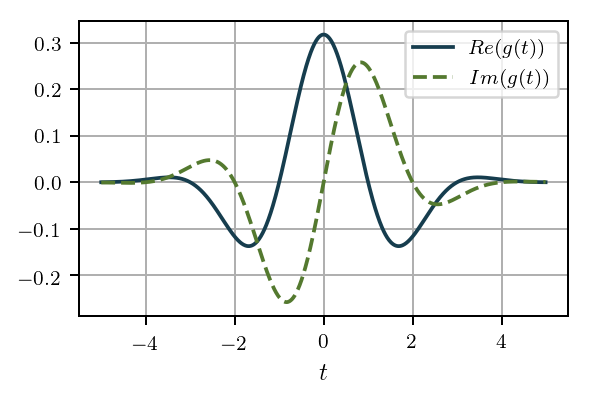

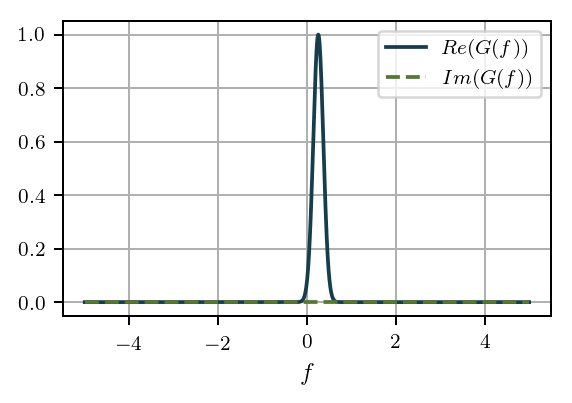

In [4]:
sigma = np.sqrt(2) * f_0
alpha = 1/(2*sigma**2)

# gamma = 1.
# gauss = (f_0 / gamma) * np.sqrt(np.pi) * np.exp(-(f_0 /gamma)**2 * t **2)
# sinoid = np.exp(1j* 2 *np.pi *f_0 * t)
# gt = gauss  * sinoid
# gf = np.exp(-(gamma * np.pi / f_0)**2 * (f-f_0)**2)




gt /= np.sqrt(2 * np.pi) * sigma

gauss_f = np.exp(- (1/alpha) * np.pi**2 * (f-f_0)**2)

# gf *= np.sqrt(np.pi/alpha)

plt.figure(figsize=set_size(width=width_pt, fraction=0.5), dpi=180)
# plt.plot(t, gauss, lw=4, c=plt.cm.cubehelix(0.6))
plt.plot(t, gt.real, c=plt.cm.cubehelix(0.2))
plt.plot(t, gt.imag, '--', c=plt.cm.cubehelix(0.4))
plt.grid()
plt.legend((r'$Re(g(t))$', r'$Im(g(t))$'), loc='upper right')
plt.xlabel(r'$t$')
# plt.ylabel(r'$g(t)$')
# plt.savefig(outdir + 'GaborFilter_time_1d.pdf', format='pdf', bbox_inches='tight')


plt.figure(figsize=set_size(width=width_pt, fraction=0.5), dpi=180)
# plt.plot(f, np.fft.fftshift(np.fft.fft(gt)), c=plt.cm.cubehelix(0))
plt.plot(f, gf.real, c=plt.cm.cubehelix(0.2))
plt.plot(f, gf.imag, '--', c=plt.cm.cubehelix(0.4))
plt.grid()
plt.xlabel(r'$f$')
# plt.ylabel(r'$G(f)$')
plt.legend((r'$Re(G(f))$', r'$Im(G(f))$'), loc='upper right')
# plt.savefig(outdir + 'GaborFilter_freq_1d.pdf', format='pdf', bbox_inches='tight')
print np.abs(gf).sum(), gt.max()
print np.abs(gt).sum(), gf.max()

The uncertainty principle shows that the size, the shape and the shift of the window through which we make measurements affects the accuracy of what we compute. For example, let us consider a signal $f(t)$ with Fourier transform $F(\omega)$. Let us assume that we observe only a part of the signal through a window $w(t)$, with Fourier transform $W(\omega)$ centered at $t_0$

\begin{equation}\label{eq:uncertainty_principle2}
    h(t) = f(t)w(t-t_0)
\end{equation}

Due to the shifting property of the Fourier transform, the Fourier transform of the window is $e^{-j\omega t_0}W(\omega)$. Since the window multiplies the signal, the Fourier transform of the window is convolved with the Fourier transform of the signal. Therefore, the Fourier transform of what we observe is given by:

\begin{equation}\label{eq:short_time_fourier_transform}
    H(\omega) = \int_{-\infty}^{\infty}F(\omega - u)e^{-ju t_0}W(u) du
\end{equation}


In general $H(\omega)$ is different from $G(\omega)$ and depends on the locality of the window $t_0$.

To see this behavior, consider a signal $f(t)=A \sin \omega_{0} t$, where $A$ is a positive constant, and a window $w(t)$ defined by a Gaussian function. 

\begin{equation}\label{eq:1d_gaussian_function2}
    w(t)=e^{-\frac{(t-t_0)^2}{2\sigma^2}}
\end{equation}

A Gaussian window is infinite in extent, so it is characterized by its locality $t_0$ and its standard deviation, which in this context is also called \textit{spread} and is denoted by $\sigma$. 

Text(0,0.5,'Phase of $H(f)$')

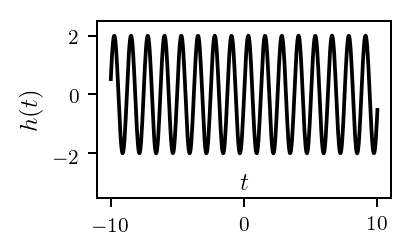

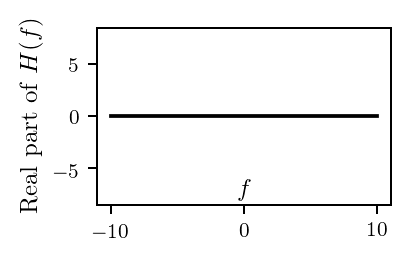

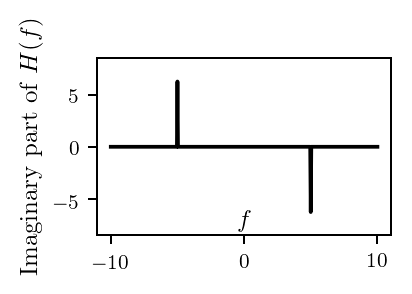

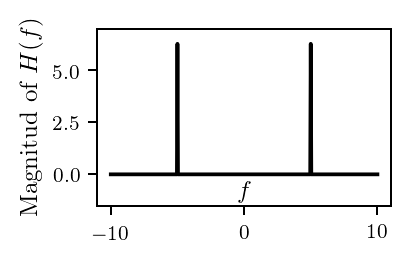

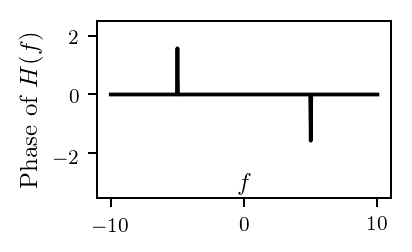

In [5]:
# Plot n. 1  sin signal and its fourier components
A = 2.

freq = 1.
omega = 5. #2*np.pi*freq
t = np.linspace(start=-10, stop=10, endpoint=True, num=501)
h = A * np.sin(omega * t)



pos_omega1 = np.where((omega-t)==0)[0][0]
pos_omega2 = np.where((omega+t)==0)[0][0]
H = (-1j * A * np.pi * signal.unit_impulse(len(t), pos_omega1) )+ (1j * A * np.pi * signal.unit_impulse(len(t), pos_omega2))



plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, h, 'k')
plt.ylim(-3.5, 2.5)
plt.xlabel(r'$t$', labelpad=-25)
plt.ylabel(r'$h(t)$')
# plt.savefig(outdir + 'sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.real(H), 'k')
plt.ylim(-8.5, 8.5)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Real part of $H(f)$')
# plt.savefig(outdir + 'real_sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.imag(H), 'k')
plt.ylim(-8.5, 8.5)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Imaginary part of $H(f)$')
# plt.savefig(outdir + 'imag_sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.abs(H), 'k')
plt.ylim(-1.5, 7)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Magnitud of $H(f)$')
# plt.savefig(outdir + 'mag_sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.angle(H), 'k')
plt.ylim(-3.5, 2.5)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Phase of $H(f)$')
# plt.savefig(outdir + 'phase_sin_signal.pdf', format='pdf', bbox_inches='tight')



0.25


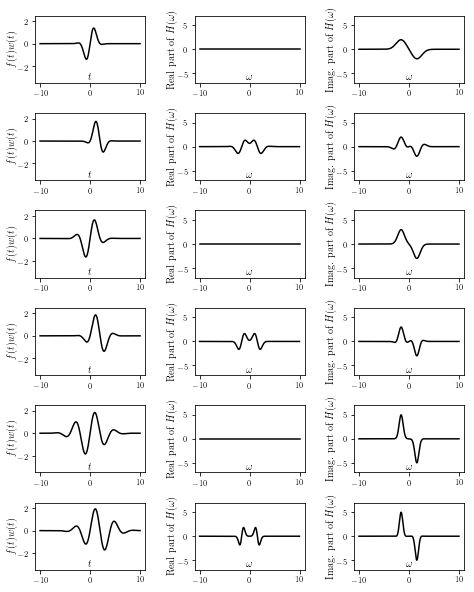

In [6]:
# Plot n. 2  windowed (gaussian) sin signal and its fourier components
A = 2.
omega = 1.
freq = f_0#
omega = 2*np.pi*freq
print freq
t = np.linspace(start=-10, stop=10, endpoint=True, num=501)
f = A * np.sin(omega * t)

t0 = [0., 1.6]
sigma = [1.0, 1.5, 2.5]
figure_size = set_size(width_pt, subplots=(6, 3))

fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.real(H), 'k')
        ax[ff, 1].set_ylim(-7, 7)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Real part of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.imag(H), 'k')
        ax[ff, 2].set_ylim(-7, 7)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Imag. part of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(outdir + 'sin_gauss_real_imag.pdf', format='pdf', bbox_inches='tight')

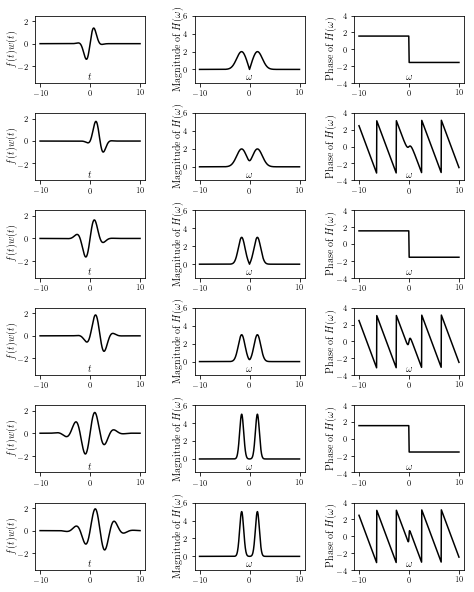

In [7]:
fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.abs(H), 'k')
        ax[ff, 1].set_ylim(-1.5, 6)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Magnitude of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.angle(H), 'k')
        ax[ff, 2].set_ylim(-4, 4)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Phase of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(outdir + 'sin_gauss_mag_phase.pdf', format='pdf', bbox_inches='tight')

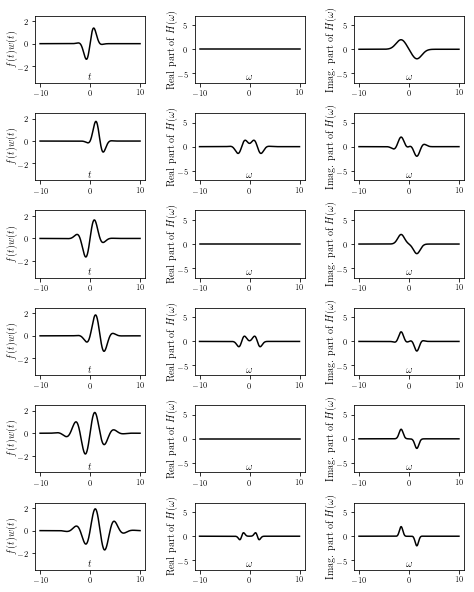

In [8]:
fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        H /= sigma[jj]
        
        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.real(H), 'k')#/sigma[jj]
        ax[ff, 1].set_ylim(-7, 7)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Real part of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.imag(H), 'k')#/sigma[jj]
        ax[ff, 2].set_ylim(-7, 7)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Imag. part of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(outdir + 'sin_gauss_real_imag.pdf', format='pdf', bbox_inches='tight')

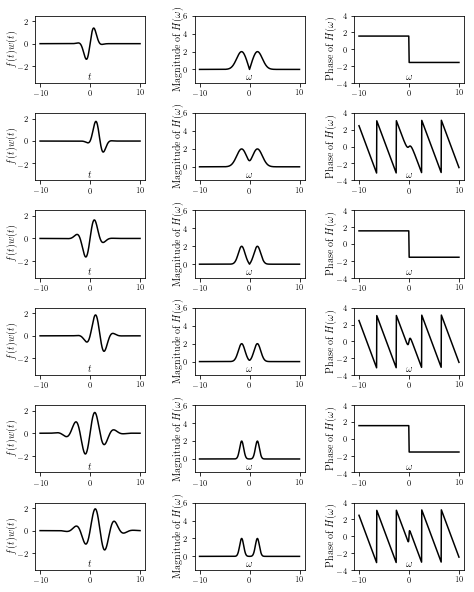

In [9]:
fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        H /= sigma[jj]

        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.abs(H), 'k')#/sigma[jj]
        ax[ff, 1].set_ylim(-1.5, 6)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Magnitude of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.angle(H), 'k')
        ax[ff, 2].set_ylim(-4, 4)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Phase of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(outdir + 'sin_gauss_mag_phase_normalized.pdf', format='pdf', bbox_inches='tight')

Figures demonstrate the result for a signal with $\omega_0=5$ and $A=2$. Figure  shows the continuous signal and  the real and imaginary parts and the magnitude and phase of its Fourier transform.  Figure  shows various windowed parts of the signal ($h(t)$) and the real and imaginary parts of their corresponding Fourier transforms.  Figure is the same as figure , but it shows the magnitude and phase of each Fourier transform. These Fourier transforms should be compared with their counterparts in figure  in order to appreciate the effect of both the size of the window and the locality of the window (Gaussian function). In all cases the main peaks of the Fourier transform's magnitude, which correspond to delta function impulses at $\omega=\pm 5$ in the continuous case, are preserved, but they become less sharp and the recovered value starts to move away from the real value as soon as the size of the window decreases. 

For the analysis of discrete signals it is possible to estimate the uncertainty principle. The easiest way is to consider signal segments and calculate the discrete Fourier transform (DFT) of each segment. This is the so-called Short Time Fourier Transform (STFT). If we consider an odd-sized window and associate the DFT that we calculate within it with the sample in the center of the window, we will be associating each sample of the signal with a small Fourier transform. In this context, how small the DTF is depends on the size of the window.

The problem with this method is that taking one part of the signal at a time is equivalent to using a rectangular window. When we calculate the Fourier transform of a discrete signal, we implicitly assume that the signal periodically repeats outside the window. This immediately introduces this repetition frequency. If the initial part of the window signal is different from the final part, when the two parts are placed next to each other, a sudden jump is created. This induces high frequencies in the Fourier domain.

Considering a discrete signal defined by

\begin{equation}\label{eq:discrete_signal}
    f(n) = A \sin \left(\frac{2 \pi n}{N}\right) \; \text{for} \; n= 0, 1, 2, \ldots, T
\end{equation}

where $N=10$, $T=127$ and $A=5$. Let us consider a window of length $2M + 1$. Therefore, to avoid border effects, the first sample on which we can place the center of the window is sample number $M$, and the last is sample number $T−M$. At each position $n$ of the window we compute the STFT for $n=M,\ldots,T−M$.

In this way, each sample $n$ is associated with $2\times(2 M+1)$ numbers, the values of the real and imaginary parts of the short time Fourier transform computed when the center of the window is placed at $n$. This is schematically shown in figure for some values of $n$ and for $M=8$. Each one of these numbers may be thought of as a feature of the signal computed locally. 


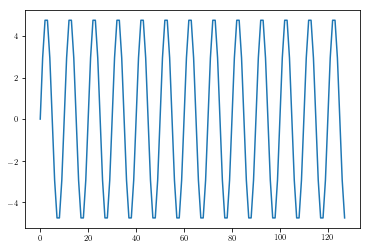

In [10]:
A = 5
N = 10
T = 127
M = 8

n = np.arange(T+1)
f = A * np.sin((2*np.pi*n)/N)


plt.figure()
plt.plot(n, f)

constant = A/np.sqrt(2*M+1)

F = np.zeros(len(n), dtype='complex128')
for nn in np.arange(M, (T-M)+1):
#     print nn
#     sin_cos = 0
#     sin_sin = 0
    for k, m in enumerate(np.arange(-M, M+1)):
#         print k, m
        sin_cos = np.sin((2*np.pi*(nn+m))/N) * np.cos((2*np.pi*k*m)/(2*M+1))
        sin_sin = np.sin((2*np.pi*(nn+m))/N) * np.sin((2*np.pi*k*m)/(2*M+1))
#         print sin_cos, sin_sin
#     F[nn] = constant * sin_cos - 1j * constant* sin_sin
        
# plt.figure()
# plt.plot(n, np.real(F))

# plt.figure()
# plt.plot(n, np.imag(F))

# plt.figure()
# plt.plot(n, np.abs(F))

# plt.figure()
# plt.plot(n, np.angle(F))

(64,) (64,)


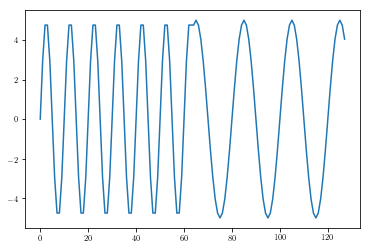

In [11]:
A = 5
N1 = 10
N2 = 20
T1 = 63
T = 127
M = 8

n = np.arange(T+1)
f1 = A * np.sin((2*np.pi*n)/N1)
f2 = A * np.sin((2*np.pi*n)/N2)

print f1[0:T1+1].shape, f2[T1+1:T+1].shape
f = np.hstack((f1[0:T1+1], f2[T1+1:T+1]))

plt.figure()
plt.plot(n, f)

constant = A/np.sqrt(2*M+1)

F = np.zeros(len(n), dtype='complex128')
for nn in np.arange(M, (T-M)+1):
#     print nn
#     sin_cos = 0
#     sin_sin = 0
    for k, m in enumerate(np.arange(-M, M+1)):
#         print k, m
        sin_cos = np.sin((2*np.pi*(nn+m))/N1) * np.cos((2*np.pi*k*m)/(2*M+1))
        sin_sin = np.sin((2*np.pi*(nn+m))/N1) * np.sin((2*np.pi*k*m)/(2*M+1))
#         print sin_cos, sin_sin
#     F[nn] = constant * sin_cos - 1j * constant* sin_sin
        
# plt.figure()
# plt.plot(n, np.real(F))

# plt.figure()
# plt.plot(n, np.imag(F))

# plt.figure()
# plt.plot(n, np.abs(F))

# plt.figure()
# plt.plot(n, np.angle(F))

\section{Gabor Filters}



# References

[<a id="cit-Gabor:JIEE:1946a" href="#call-Gabor:JIEE:1946a">1</a>] Gabor D., ``_Theory of Communication. Part 1: The Analysis of Information_'', Journal of the Institution of Electrical Engineers - Part III: Radio and Communication Engineering, vol. 93, number 26, pp. 429--441, November 1946.

[<a id="cit-Bracewell:FourierBook:1999" href="#call-Bracewell:FourierBook:1999">2</a>] Ronald N. Bracewell, ``_The Fourier Transform and Its Applications_'', July 1999.

